We will extend the Hugging Face tutorials in this notebook to help you quickly get started with your own generative AI model building setup.

As usual we will start by importing the required packages.

In [7]:
from transformers import pipeline
from transformers import ViTFeatureExtractor, ViTForImageClassification

from IPython.display import Image as DisplayImage
from PIL import Image

import requests

## Image Classification
Let us start by exploring pre-trained models for computer vision. We will first try our a model that predicts one of the [1000 ImageNet classes](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/) on any image you can provide. Try sourcing random images from Wikipedia or other creative commons sources to stretch the model to its limits. The [Google Vision Transformer (ViT) model](https://huggingface.co/google/vit-base-patch16-224) is pre-trained on [ImageNet-21k (14 million images, 21,843 classes)](http://www.image-net.org/) at resolution 224x224, and fine-tuned on ImageNet 2012 (1 million images, 1,000 classes) at resolution 224x224.

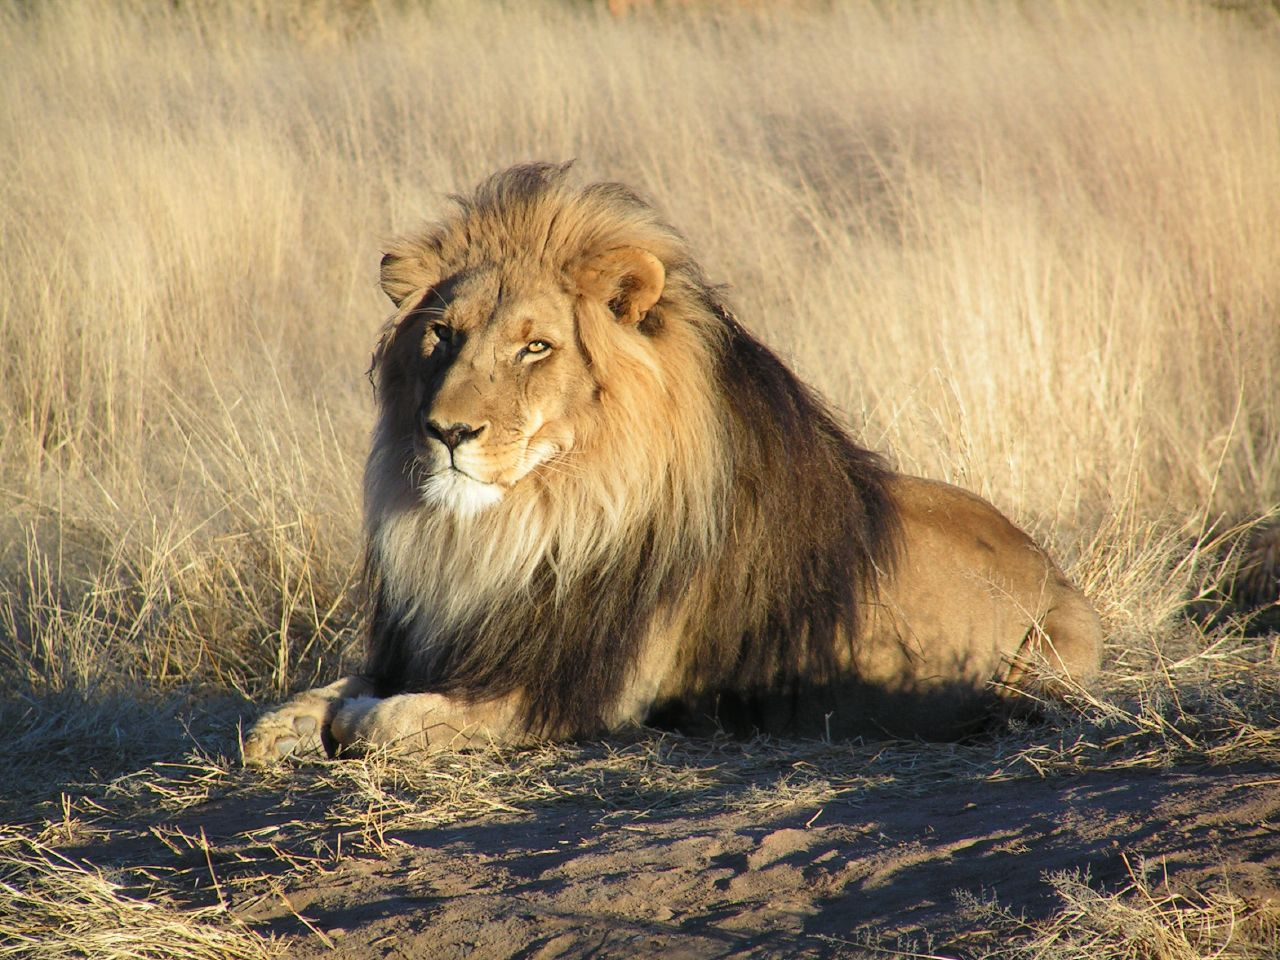

In [8]:
url = "https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg"
DisplayImage(url)

### Transformers pipeline for generalized model inference
The first method to use the model is using the generalized `pipeline` function from the Hugging Face `transformers` package. This function does not require knowledge of how the underlying model works or usage of deep learning frameworks like Pytorch or Tensorflow. The downside is that as the underlying models are evolving at a rapid pace, so is their model specific API and sometimes this leads to deprecation warnings when using this method.

In [9]:
vision_classifier = pipeline(model="google/vit-base-patch16-224")
preds = vision_classifier(images=url)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

[{'score': 0.9982, 'label': 'lion, king of beasts, Panthera leo'},
 {'score': 0.0004, 'label': 'leopard, Panthera pardus'},
 {'score': 0.0002, 'label': 'cheetah, chetah, Acinonyx jubatus'},
 {'score': 0.0002, 'label': 'tiger, Panthera tigris'},
 {'score': 0.0001,
  'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}]

### API for specific model inference
The second method is to use model specific API to perform inference. This method requires knowledge of model API and basic understanding of a deep learning framework like Pytorch or Tensorflow. The upside is that this method will be more current and customizable specific to the model in use.

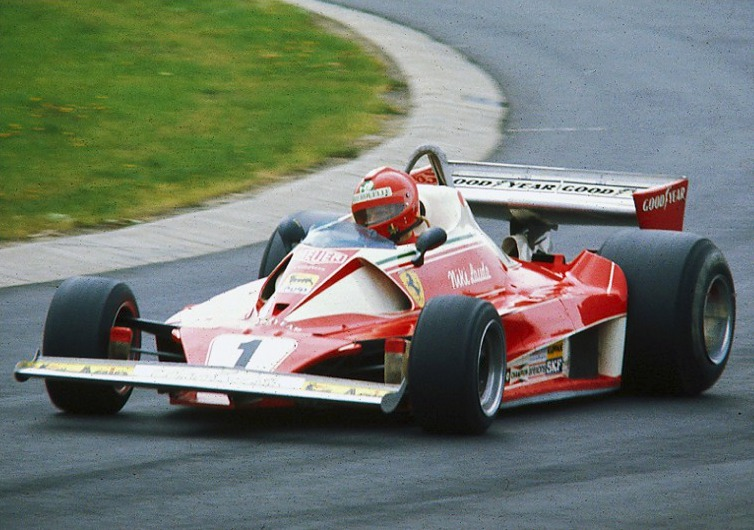

In [10]:
url = 'https://upload.wikimedia.org/wikipedia/commons/d/d4/LaudaNiki19760731Ferrari312T2.jpg'
DisplayImage(url)

In [11]:
image = Image.open(requests.get(url, stream=True).raw)

In [12]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: racer, race car, racing car
